In [2]:
!pip install yfinance pandas matplotlib

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import timedelta


In [5]:
events = pd.read_csv("table.csv")

events["EventDate"] = pd.to_datetime(
    events["Initial Media Release Date"],
    errors="coerce"
)

events


,Instance,News Type / Sector,Proxy Event,Initial Media Release Date,Market Impact (Dips/Rises),Data Source/Analysis,EventDate
0,1,War/Conflicts / Defense,Russia-Ukraine Invasion,"February 24, 2022",Global defense stocks positively impacted (81....,", , ; Analysis: Wars boost defense via budgets...",2022-02-24
1,2,War/Conflicts / Commodities,Russia-Ukraine Invasion,"February 24, 2022","Commodity prices rose 20-50% (e.g., wheat +40%...",", , ; Analysis: Supply disruptions hiked price...",2022-02-24
2,3,Trade Relations / Commodities,India-Australia ECTA FTA,"December 29, 2022 (entry into force; signed Ap...",Exports grew 135% (2019-2021 baseline); agri s...,", , ; Analysis: Tariff reductions boosted expo...",NaT
3,4,Trade Relations / Technology,India-Australia ECTA FTA,"December 29, 2022",IT exports gained access; eliminated double ta...,", ; Analysis: Enhanced market access and tax r...",2022-12-29
4,5,Budget Reforms / Energy,Union Budget 2024,"February 1, 2024",Nifty Energy up 3.16% post-budget; allocations...,", , ; Analysis: Focus on energy transition (e....",2024-02-01
5,6,Budget Reforms / Transportation,Union Budget 2024,"February 1, 2024","Shipping stocks up 3-5% (e.g., SCI +9.07%); ra...",", ; Analysis: Waterways/ports push (48% increa...",2024-02-01
6,7,Regulatory Changes / Energy,Net Zero Pledge at COP26,"November 1, 2021",Nifty Energy growth from transition focus (81%...,; Analysis: Long-term net zero by 2070 signale...,2021-11-01
7,8,Regulatory Changes / Shipping,Sagarmala Programme Launch,March 2015 (cabinet approval; updates 2022),Shipping traffic +118%; SCI gains from port mo...,", , ; Analysis: Infra investments (₹5.79 lakh ...",NaT


In [20]:
DEFENCE_STOCKS = ["HAL.NS", "BEL.NS", "BEML.NS", "BDL.NS"]

sector_ticker_map = {
    "Defense": DEFENCE_STOCKS,   # Nifty India Defence 
    "Commodities": "^CNXMETAL", # Nifty Metal
    "Technology": "^CNXIT",     # Nifty IT
    "Energy": "^CNXENERGY"      # Nifty Energy
}



In [ ]:
def event_window_returns(ticker_or_list, event_date, window=30):
    start = event_date - timedelta(days=window)
    end   = event_date + timedelta(days=window)

    # If basket of stocks
    if isinstance(ticker_or_list, list):
        data = yf.download(ticker_or_list, start=start, end=end, progress=False)["Close"]
        prices = data.mean(axis=1)

    else:
        data = yf.download(ticker_or_list, start=start, end=end, progress=False)

        if data.empty:
            return None

        if isinstance(data.columns, pd.MultiIndex):
            data.columns = data.columns.get_level_values(0)

        prices = data["Adj Close"] if "Adj Close" in data else data["Close"]

    prices = prices.dropna()
    returns = prices / prices.iloc[0] - 1
    returns.index = range(-len(returns)//2, -len(returns)//2 + len(returns))

    return returnsevents["EventDate"] = pd.to_datetime(
    events["Initial Media Release Date"],
    errors="coerce"
)


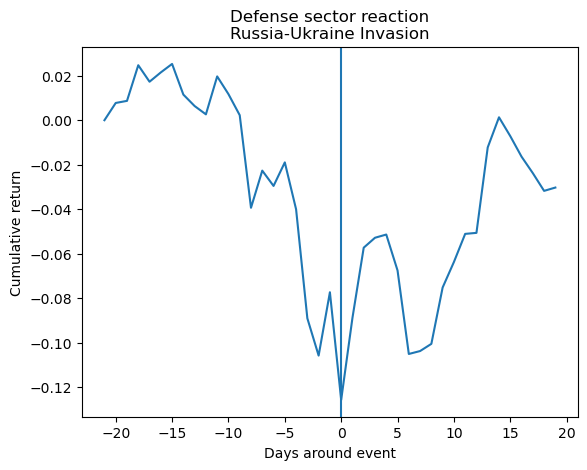

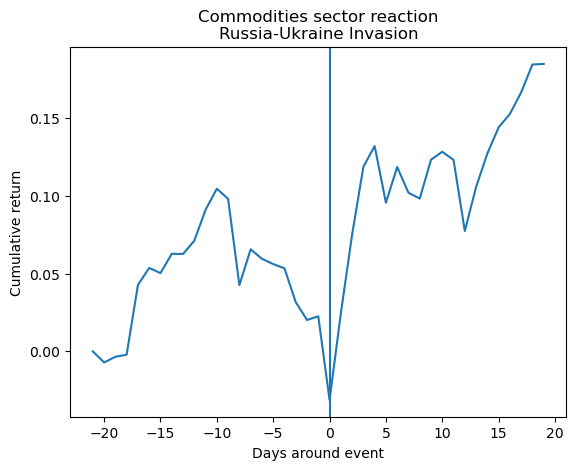

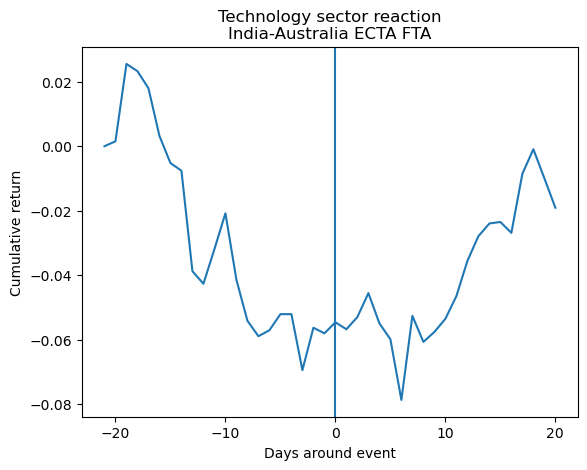

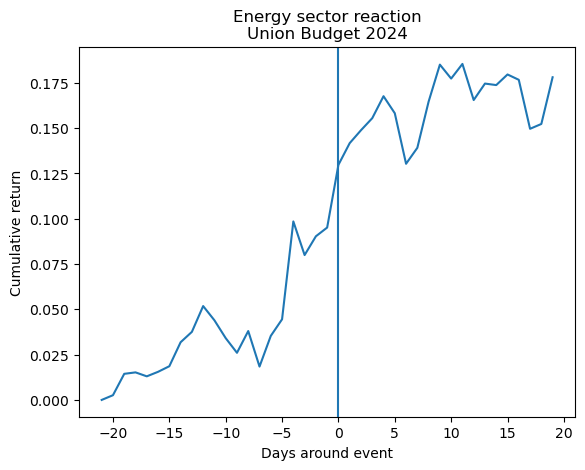

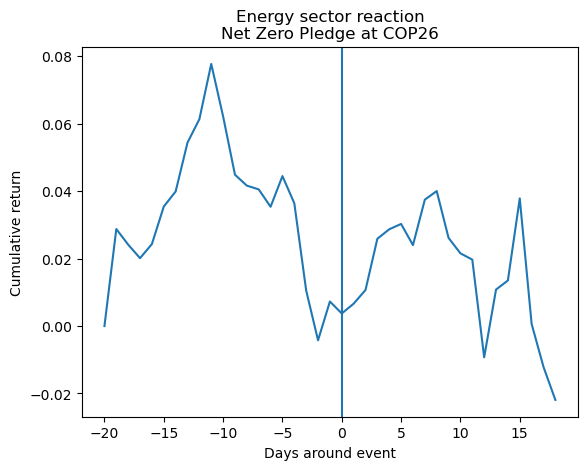

In [22]:
for _, row in events.iterrows():
    sector_info = row["News Type / Sector"]
    event_date  = row["EventDate"]

    if pd.isna(event_date):
        continue

    
    sector_key = None
    for key in sector_ticker_map:
        if key.lower() in sector_info.lower():
            sector_key = key
            break

    if sector_key is None:
        continue

    ticker = sector_ticker_map[sector_key]
    returns = event_window_returns(ticker, event_date)

    if returns is None:
        continue

    plt.figure()
    plt.plot(returns.index, returns.values)
    plt.axvline(0)  
    plt.title(f"{sector_key} sector reaction\n{row['Proxy Event']}")
    plt.xlabel("Days around event")
    plt.ylabel("Cumulative return")
    plt.show()
